In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=c04c3e62c0c6ad39ee53bbc71925f0db4850496eb07e931c023505e843e17d10
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=bd8d4f1794d7233cffac22fdc8e64e2d0408856a798b83790e9e2054b260f7c5
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
# /content/drive/MyDrive/Data/activities.csv
users_details_df = pd.read_csv('/content/drive/MyDrive/Data/user_details.csv')
trips_df = pd.read_csv('/content/drive/MyDrive/Data/trips.csv')
legs_df = pd.read_csv('/content/drive/MyDrive/Data/legs.csv')
leg_coordinates_df = pd.read_csv('/content/drive/MyDrive/Data/legs_coordinates.csv')
activities_df = pd.read_csv('/content/drive/MyDrive/Data/activities.csv')
experience_factors_df = pd.read_csv('/content/drive/MyDrive/Data/experience_factors.csv')
purposes_df = pd.read_csv('/content/drive/MyDrive/Data/purposes.csv')
weather_legs_df = pd.read_csv('/content/drive/MyDrive/Data/weather_legs.csv')
user_generic_df = pd.read_csv('/content/drive/MyDrive/Data/user_generic_worthwhileness_values.csv')
user_specific_df = pd.read_csv('/content/drive/MyDrive/Data/user_specific_worthwhileness_values.csv')
mots_df = pd.read_csv('/content/drive/MyDrive/Data/mots.csv')
weather_raw_df = pd.read_csv('/content/drive/MyDrive/Data/weather_raw.csv')
worthwhileness_df = pd.read_csv('/content/drive/MyDrive/Data/worthwhileness_elements_from_trips.csv')

<ipython-input-3-429f5691eb40>:14: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_legs_df = pd.read_csv('/content/drive/MyDrive/Data/weather_legs.csv')


Data Loading: Multiple CSV files related to user details, trip details, activities, and other datasets are loaded into pandas DataFrames.

Data Transformation: Columns 'fit', 'prod', and 'enjoy' from the user_specific_df DataFrame are transformed into categorical values (0, 1, or 2) based on intervals.

Dimensionality Reduction: The code utilizes the UMAP (Uniform Manifold Approximation and Projection) technique to reduce the dimensionality of the dataset for easier visualization and processing.

Data Clustering: KMeans clustering is applied to the reduced data to group similar data points together. An elbow method visualizer determines the optimal number of clusters.

Cluster Evaluation: The clustering results are evaluated using metrics like silhouette score and Calinski Harabasz score.

Visualization: The clustered data, reduced to two dimensions, is visualized using scatter plots with the clusters differentiated by gender and age range.

To provide an alternative approach, consider using Principal Component Analysis (PCA) for dimensionality reduction instead of UMAP, and DBSCAN for clustering instead of KMeans. Here's a broad structure of an alternative:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert values in the columns 'fit', 'prod', 'enjoy' to classes 0, 1, or 2 based on defined intervals using a function
def classify_column(val):
    if -2 <= val <= 32:
        return 0
    elif 32 < val <= 65:
        return 1
    else:
        return 2

cols_to_convert = ["fit", "prod", "enjoy"]
for col in cols_to_convert:
    user_specific_df[f'gen{col.capitalize()}'] = user_specific_df[col].apply(classify_column)

# Display the transformed dataframe
print(user_specific_df)

X_transformed = user_specific_df.drop(["userid"], axis=1)
print(X_transformed.shape)
print("NA values in the dataset: ", X_transformed.isnull().values.any())





                             userid  motid  fit  prod  enjoy  genFit  genProd  \
0      03bfT4WZ6SfiFFajcrkoNfNKMpN2      1   50    50     50       1        1   
1      03bfT4WZ6SfiFFajcrkoNfNKMpN2     25   50    50     50       1        1   
2      03bfT4WZ6SfiFFajcrkoNfNKMpN2     36   50    50     50       1        1   
3      07KyflZkq6WTDpjNKRszXxmp67z2      1   50    80     80       1        2   
4      07KyflZkq6WTDpjNKRszXxmp67z2      9    0    10     30       0        0   
...                             ...    ...  ...   ...    ...     ...      ...   
15367  z7wL7FSTgBdt2Ds0ptPN2BHGrmc2     10   10    70     60       0        2   
15368  z7wL7FSTgBdt2Ds0ptPN2BHGrmc2     33   10    90     60       0        2   
15369  z7wL7FSTgBdt2Ds0ptPN2BHGrmc2     28   30    90     70       0        2   
15370  z7wL7FSTgBdt2Ds0ptPN2BHGrmc2      7   50    10     50       1        0   
15371  z7wL7FSTgBdt2Ds0ptPN2BHGrmc2      1   80     0     80       2        0   

       genEnjoy  
0        

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


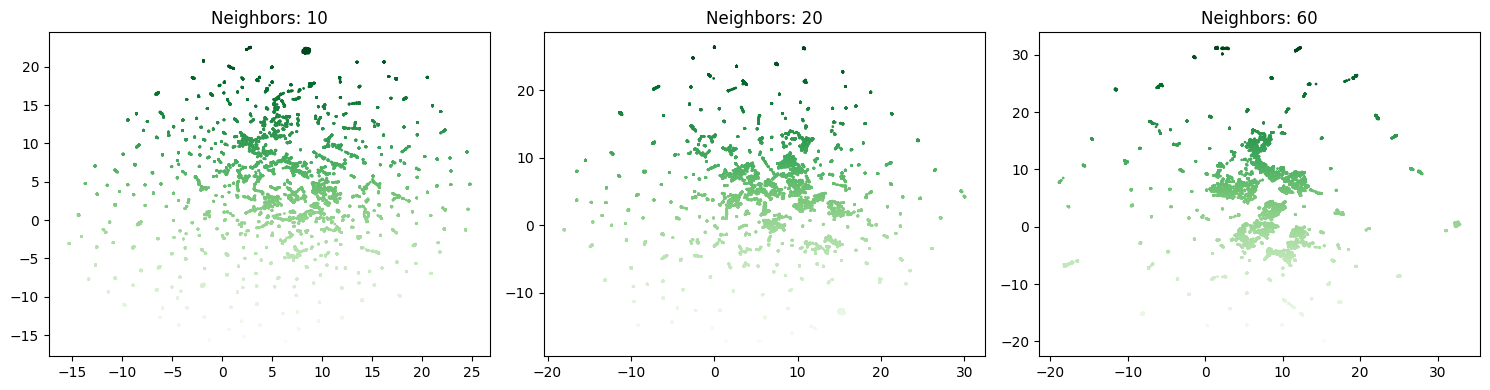

In [5]:
import umap

# Use UMAP for dimensionality reduction
n_neighbors = 60
n_components = 2
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.0, n_components=n_components, random_state=42)
reduced_data_umap = reducer.fit_transform(X_transformed)

# Plot UMAP embeddings for different n_neighbors
n_neighbors_lst = [10, 20, 60]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, neighbors in zip(axes, n_neighbors_lst):
    embedding = umap.UMAP(n_neighbors=neighbors, random_state=42).fit_transform(X_transformed)
    ax.scatter(embedding[:, 0], embedding[:, 1], s=0.9, c=embedding[:, 1], cmap='Greens')
    ax.set_title(f"Neighbors: {neighbors}")

plt.tight_layout()
plt.show()


Certainly! Let's break down the code and explain the tasks performed. Afterwards, I will provide a reorganized version of the code.

### Explanation:

1. **Importing Necessary Libraries**:
    - Various libraries related to data processing, clustering, and visualization are imported.

2. **Data Standardization**:
    - A function (`standardize_data()`) is defined that takes a dataframe and returns the standardized version of it using the Z-score method.

3. **KMeans - Elbow Method**:
    - The function `kmeans_elbow()` uses the KElbowVisualizer from the `yellowbrick` library to find the optimal number of clusters using the elbow method. This function can use one of three metrics: distortion, silhouette, and calinski_harabasz.

4. **KMeans Clustering**:
    - The function `kmeans()` applies the KMeans clustering algorithm on the given data and returns cluster labels and centroids for the optimal number of clusters.

5. **Hierarchical Clustering**:
    - The function `hierarchical()` applies hierarchical clustering on the data for a given number of clusters and returns the cluster labels.

6. **Applying Clustering on UMAP Reduced Data**:
    - The KMeans elbow method is applied to the UMAP reduced data (`reduced_data_umap`) using all three metrics. The optimal number of clusters (`kopt`) and clustering scores (silhouette and calinski_harabasz) for each metric are stored in `kmeans_dict_red_umap`.

7. **Labeling and Merging Data**:
    - The obtained cluster labels are merged with the `user_specific_df` dataframe.
    - This combined dataframe is then merged with `cluster_df_umap` and `users_details_df` to include UMAP components and user details like gender and age_range, respectively.

8. **Visualization**:
    - Two scatterplots are created:
        - One differentiates users based on their gender for each cluster.
        - The other differentiates users based on their age range for each cluster.
    - The UMAP components serve as the x and y axes for these plots.


In [6]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer


def standardize_data(df_tr):
    """
    Standardize data for clustering.
    The input dataset should not contain indices or ID columns.

    Parameters:
    - df_tr: DataFrame to standardize

    Returns:
    - X_transformed: Standardized data
    """
    # Compute Z-scores and replace NaN values with 0
    data = stats.zscore(df_tr)
    data[np.isnan(data)] = 0

    # Return the standardized data
    return StandardScaler().fit_transform(data)


def kmeans_elbow(df, metric='distortion', save_fig=False):
    """
    Determine the optimal number of clusters using the elbow method.

    Parameters:
    - df: Scaled data for clustering
    - metric: Evaluation metric to use (default is 'distortion')
    - save_fig: Flag to save the figure (default is False)

    Returns:
    - k: Optimal number of clusters
    """
    # Define and fit the KElbowVisualizer
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 12), metric=metric)
    visualizer.fit(df)
    visualizer.show() if save_fig else visualizer.show(outpath="elbow_plot.png")

    return visualizer.elbow_value_


def kmeans(k, df):
    """
    Apply KMeans clustering on data.

    Parameters:
    - k: Number of clusters
    - df: Data to cluster

    Returns:
    - labels: Cluster labels
    - centroids: Cluster centroids
    """
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    return labels, km.cluster_centers_


def hierarchical(df, k, affinity='euclidean', linkage='single'):
    """
    Apply hierarchical clustering on data.

    Parameters:
    - df: Data to cluster
    - k: Number of clusters
    - affinity: Metric used to compute linkage (default is 'euclidean')
    - linkage: Linkage criterion (default is 'single')

    Returns:
    - labels: Cluster labels
    """
    hier = AgglomerativeClustering(n_clusters=k, affinity=affinity, linkage=linkage)
    return hier.fit_predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

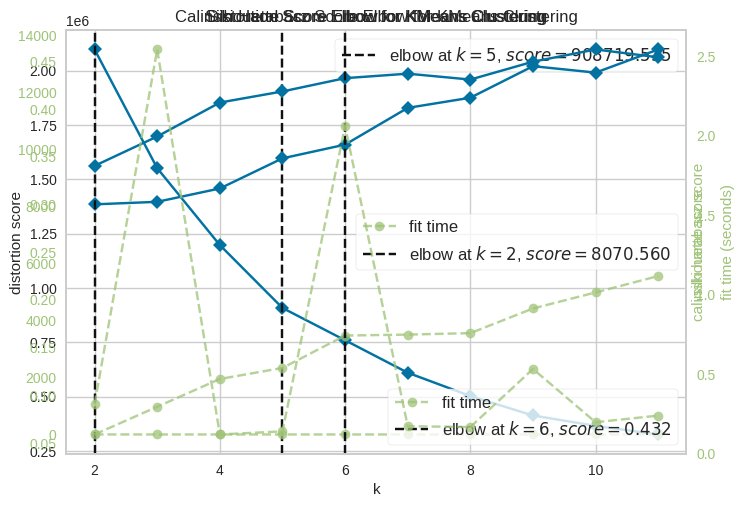

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import sklearn.metrics as metrics


# Clustering and Evaluation:
kmeans_dict_red_umap = {}
metrics_dict = {"distortion", "silhouette", "calinski_harabasz"}

for metric in metrics_dict:
    kopt = kmeans_elbow(reduced_data_umap, metric=metric)
    if kopt:
        labels, _ = kmeans(kopt, reduced_data_umap)
        kmeans_dict_red_umap[metric] = {
            "kopt": kopt,
            "silhouette": metrics.silhouette_score(reduced_data_umap, labels),
            "calinski_harabasz": metrics.calinski_harabasz_score(reduced_data_umap, labels)
        }


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

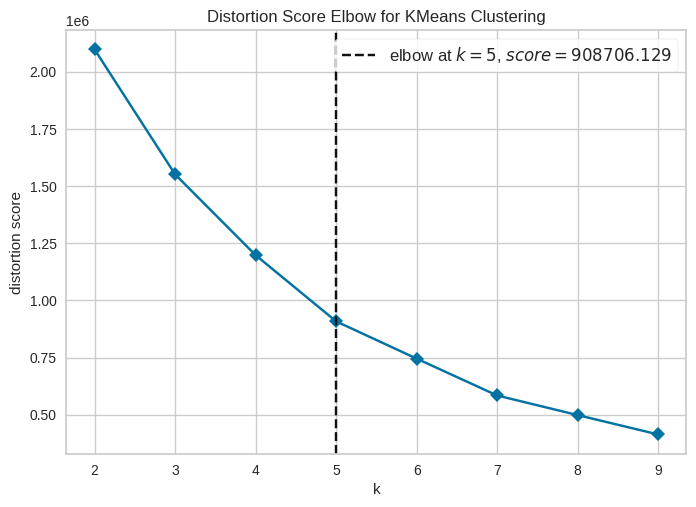

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

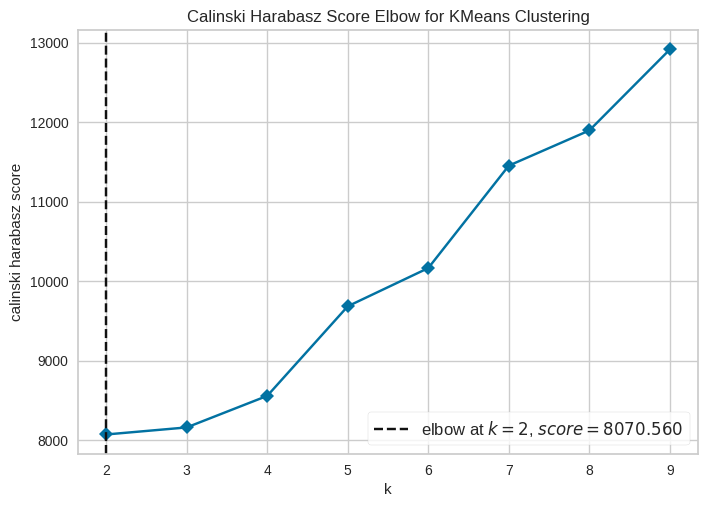

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

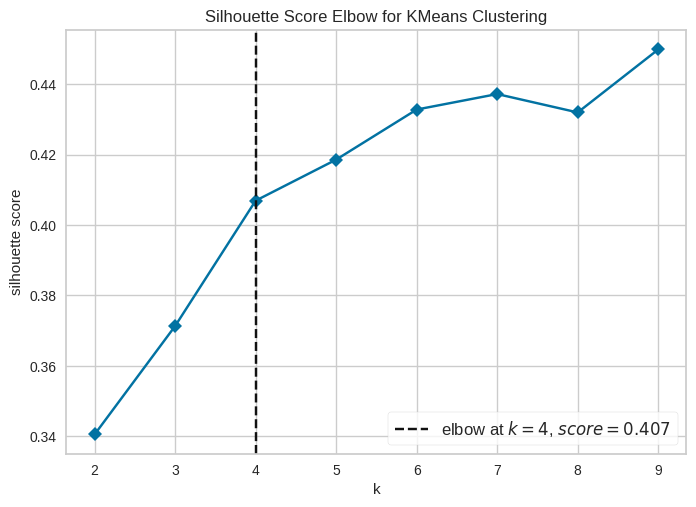

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
def kmeans_elbow(data, metric):
    # Instantiate a scikit-learn KMeans model
    model = KMeans()

    # Instantiate the KElbowVisualizer with the number of clusters and metric
    visualizer = KElbowVisualizer(model, k=(2,10), metric=metric, timings=False)

    # Fit the data and visualize
    visualizer.fit(data)
    visualizer.show()

    # Return the optimal number of clusters
    return visualizer.elbow_value_

for metric in metrics_dict:
    kopt = kmeans_elbow(reduced_data_umap, metric=metric)
    if kopt:
        labels, _ = kmeans(kopt, reduced_data_umap)
        kmeans_dict_red_umap[metric] = {
            "kopt": kopt,
            "silhouette": metrics.silhouette_score(reduced_data_umap, labels),
            "calinski_harabasz": metrics.calinski_harabasz_score(reduced_data_umap, labels)
        }


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-488c79e7bf57>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_plot['index'] = data_for_plot.index


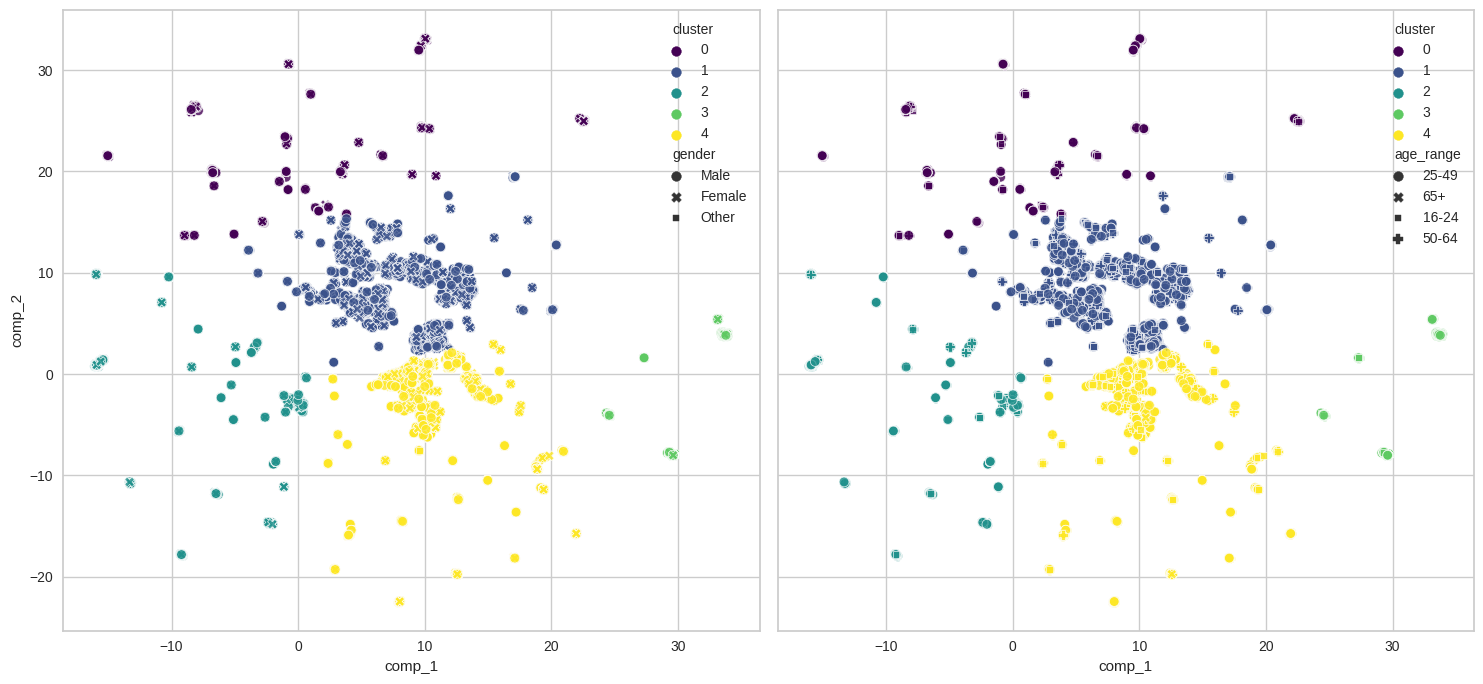

In [9]:
k = 5
labels, _ = kmeans(k, reduced_data_umap)
# Prepare Data for Visualization:
all_data_clustered = user_specific_df.copy()
all_data_clustered["cluster"] = labels

cluster_df_umap = pd.DataFrame(reduced_data_umap, columns=['comp_1', 'comp_2'])
cluster_df_umap["cluster"] = labels
cluster_df_umap['index'] = cluster_df_umap.index

data_for_plot = all_data_clustered[["userid", "cluster"]]
data_for_plot['index'] = data_for_plot.index

data_for_plot1 = data_for_plot.merge(cluster_df_umap, on=["index", "cluster"])
data_for_plot1 = data_for_plot1.merge(users_details_df[["userid", "gender", "age_range"]], on="userid")

# Visualization:
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
sns.scatterplot(x="comp_1", y="comp_2", hue="cluster", style="gender", data=data_for_plot1, legend="full", alpha=0.8, ax=axes[0], palette="viridis")
sns.scatterplot(x="comp_1", y="comp_2", hue="cluster", style="age_range", data=data_for_plot1, legend="full", alpha=0.8, ax=axes[1], palette="viridis")

plt.tight_layout()
plt.show()


In [10]:
df_reduced_data_umap = pd.DataFrame(reduced_data_umap, columns=[f"UMAP_{i}" for i in range(reduced_data_umap.shape[1])])


In [11]:
# Required Libraries
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define possible linkage and affinity options
linkages = ["ward", "complete", "average", "single"]
affinities = ["euclidean", "manhattan", "cosine"]

# Generate all combinations and filter out the undesired ones
combinations = list(itertools.product(linkages, affinities))
combinations = [comb for comb in combinations if comb not in [("ward", "manhattan"), ("ward", "cosine")]]

# Initialize DataFrame for clustering results
result_columns = ["n_clusters"] + [f"{link}_{aff}_metric" for link, aff in combinations for metric in ["silhouette", "calinski_harabasz"]]
results_df = pd.DataFrame(columns=result_columns)

# Cluster data and store results
for cluster_count in range(2, 16):
    row_data = [cluster_count]

    for link, aff in combinations:
        cluster_labels = hierarchical(reduced_data_umap, cluster_count, affinity=aff, linkage=link)

        silhouette_val = np.round(metrics.silhouette_score(reduced_data_umap, cluster_labels), 2)
        calinski_val = np.round(metrics.calinski_harabasz_score(reduced_data_umap, cluster_labels), 2)

        row_data.extend([silhouette_val, calinski_val])

    results_df.loc[len(results_df)] = row_data

# Specific clustering and visualization
selected_affinity = "euclidean"
selected_linkage = "ward"
selected_cluster_count = 5

selected_labels = hierarchical(reduced_data_umap, selected_cluster_count, affinity=selected_affinity, linkage=selected_linkage)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [12]:
# Prepare datasets for visualization
visualization_data = np.column_stack((reduced_data_umap, selected_labels))
# visualization_data = reduced_data_umap.assign(cluster=selected_labels)
full_data_with_cluster = user_specific_df.assign(cluster=selected_labels)

# Display metrics
print("Silhouette score:", np.round(metrics.silhouette_score(reduced_data_umap, selected_labels), 2))
print("Calinski Harabasz score:", np.round(metrics.calinski_harabasz_score(reduced_data_umap, selected_labels), 2))



Silhouette score: 0.4
Calinski Harabasz score: 9094.38


In [18]:
# Convert visualization_data to DataFrame
df_visualization_data = pd.DataFrame(visualization_data, columns=[f"UMAP_{i}" for i in range(visualization_data.shape[1]-1)] + ["cluster"])

scatter_data = (full_data_with_cluster[["userid", "cluster"]]
                .assign(data_index=lambda df: df.index)
                .merge(df_visualization_data.assign(data_index=lambda df: df.index), on=["data_index", "cluster"])
                .merge(users_details_df[["userid", "gender", "age_range"]], on="userid"))


In [20]:
print(scatter_data.columns)

Index(['userid', 'cluster', 'data_index', 'UMAP_0', 'UMAP_1', 'gender',
       'age_range'],
      dtype='object')


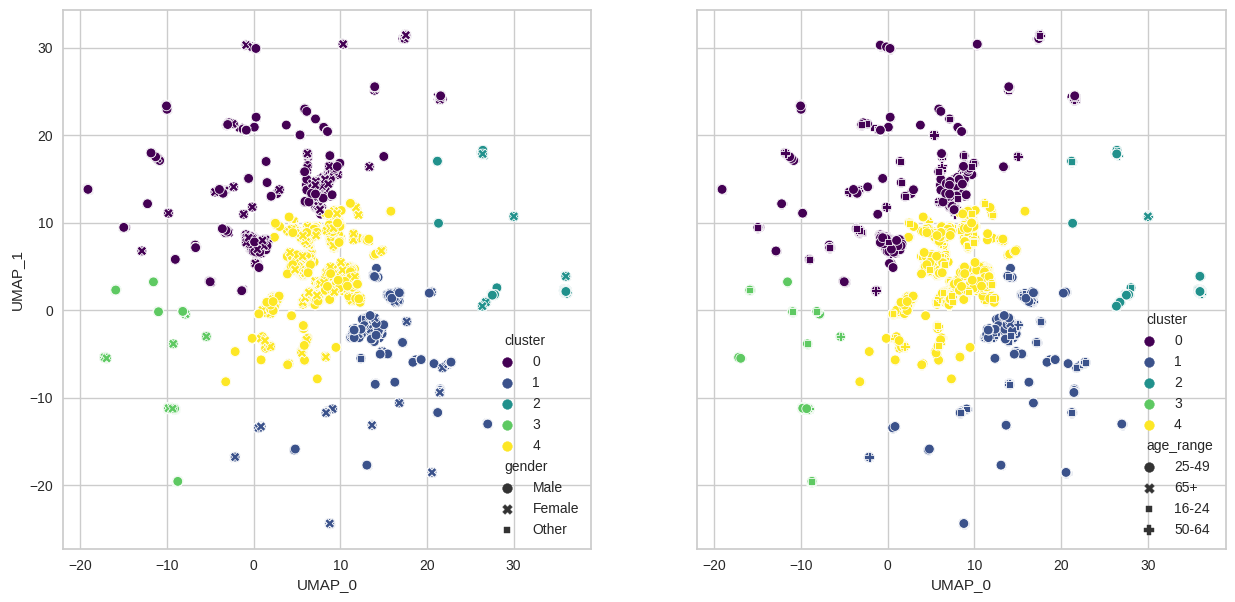

In [22]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

sns.scatterplot(x="UMAP_0", y="UMAP_1", hue="cluster", style="gender", palette="viridis", data=scatter_data, ax=ax1)
sns.scatterplot(x="UMAP_0", y="UMAP_1", hue="cluster", style="age_range", palette="viridis", data=scatter_data, ax=ax2)

plt.show()



In [11]:
# Debug info
print('User details columns:', users_details_df.columns)
print('User data columns:', user_specific_df.columns)
print('Leg data columns:', legs_df.columns)

User details columns: Index(['userid', 'registration_date', 'gender', 'age_range', 'lang', 'city',
       'country', 'education_level', 'marital_status_household',
       'number_people_household', 'labour_status_household',
       'years_of_residence_household'],
      dtype='object')
User data columns: Index(['userid', 'motid', 'fit', 'prod', 'enjoy', 'genFit', 'genProd',
       'genEnjoy'],
      dtype='object')
Leg data columns: Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

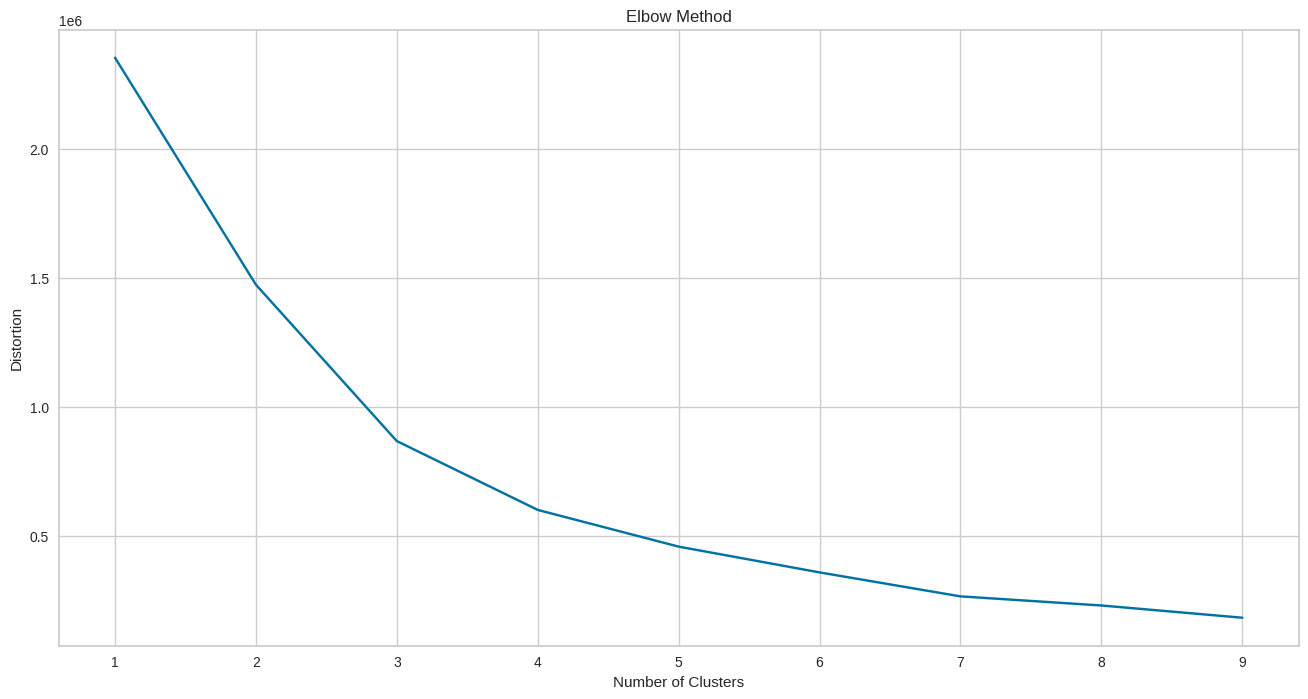

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


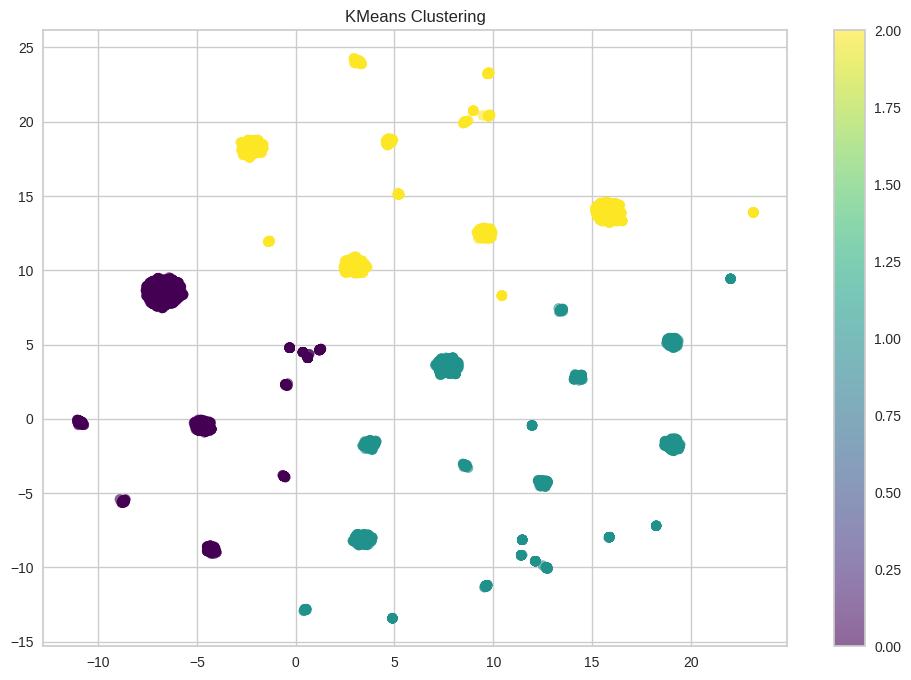

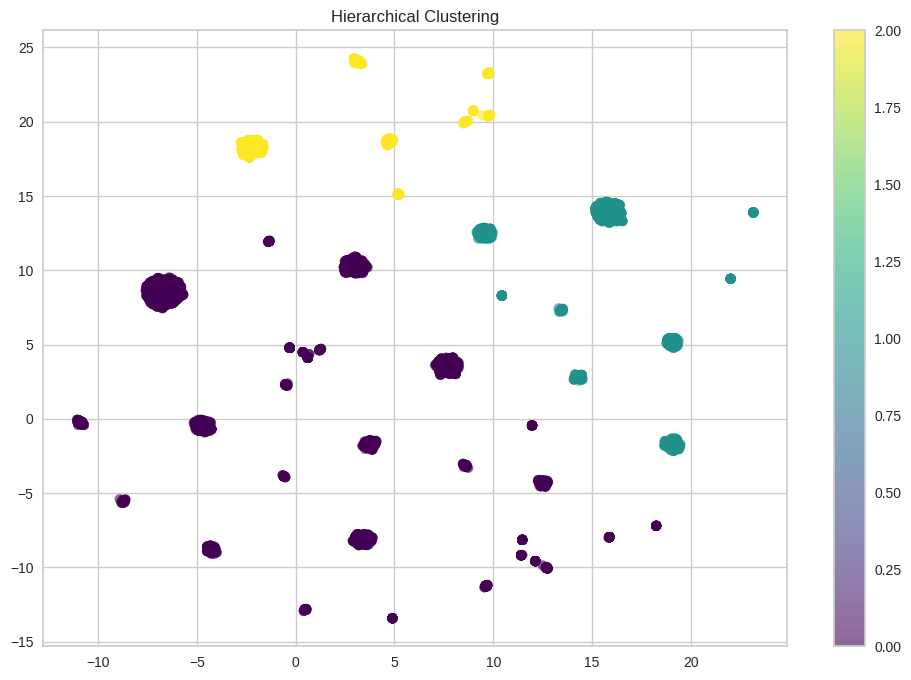

<ipython-input-28-f9e423fe2ee1>:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = self.users_profile.groupby(f'{cluster_type}_Cluster').mean()
<ipython-input-28-f9e423fe2ee1>:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = self.users_profile.groupby(f'{cluster_type}_Cluster').std()
<ipython-input-28-f9e423fe2ee1>:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = self.users_profile.groupby(f'{cl

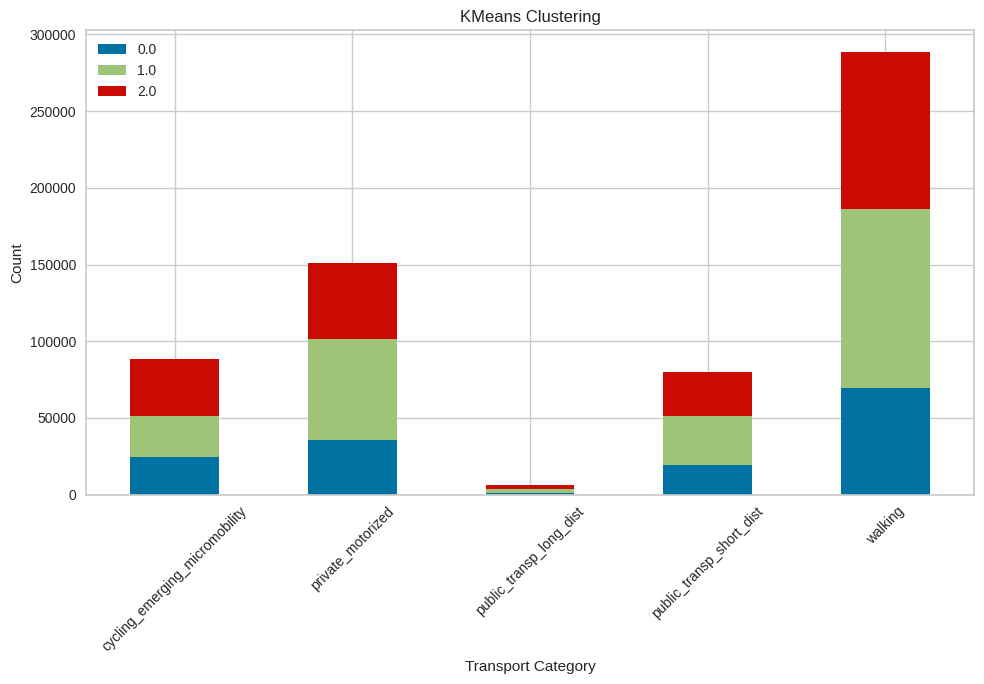

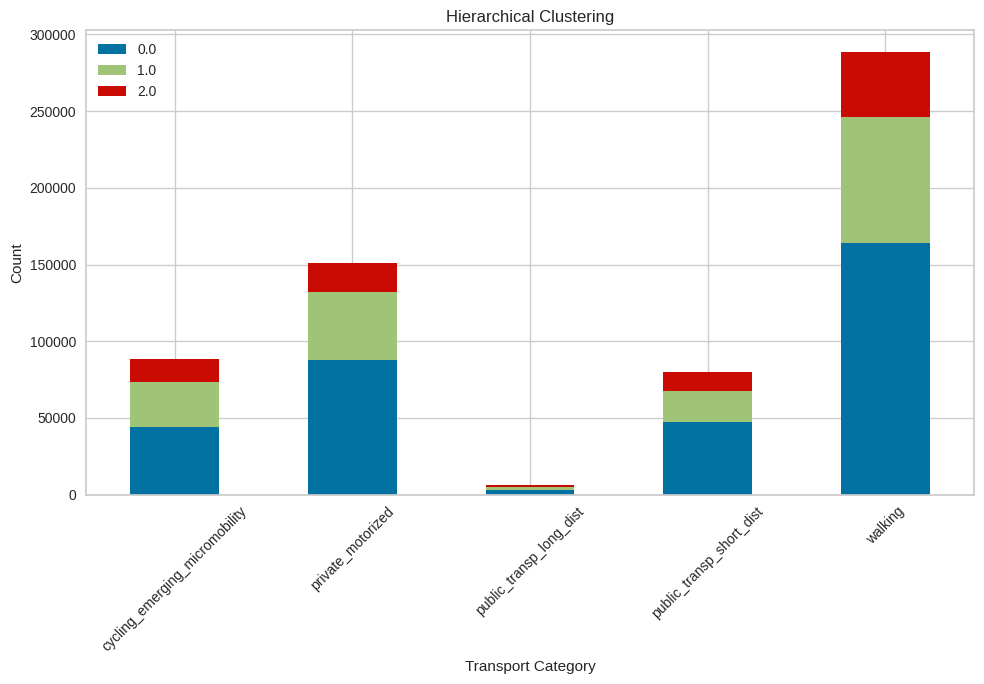

In [28]:
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

class ClusterAnalysis:

    # def __init__(self, profile_data, demographics_data):
    #     self.users_profile = profile_data.copy()
    #     self.users_demographics = demographics_data.copy()

    def __init__(self, users_profile, demographics_data):
        self.users_profile = users_profile.copy()
        self.users_demographics = demographics_data.copy()

    def preprocess_data(self):
        for col in self.users_profile.columns[1:]:
            bins = [-2, 32, 65, 100]
            labels = [0, 1, 2]
            self.users_profile[col] = pd.cut(self.users_profile[col], bins, labels=labels, right=True)

    def reduce_dimensions(self, n_components=2, n_neighbors=10):
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.0, n_components=n_components, random_state=42)
        return pd.DataFrame(reducer.fit_transform(self.users_profile.drop(["userid"], axis=1)))

    @staticmethod
    def plot_elbow(data):
        distortions = []
        K = range(1, 10)
        for k in K:
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(data)
            distortions.append(kmeans.inertia_)

        plt.figure(figsize=(16, 8))
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Distortion')
        plt.title('Elbow Method')
        plt.show()

    @staticmethod
    def perform_kmeans(data, clusters=3):
        kmeans = KMeans(n_clusters=clusters)
        return kmeans.fit_predict(data)

    @staticmethod
    def perform_hierarchical(data, clusters=3):
        h_clustering = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
        return h_clustering.fit_predict(data)

    @staticmethod
    def plot_clusters(data, labels, title, cmap='viridis'):
        plt.figure(figsize=(12, 8))
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap=cmap, s=50, alpha=0.6)
        plt.colorbar()
        plt.title(title)
        plt.show()

    def add_cluster_columns(self, kmeans_clusters, hierarchical_clusters):
        self.users_profile['KMeans_Cluster'] = kmeans_clusters
        self.users_profile['Hierarchical_Cluster'] = hierarchical_clusters

    def analyze_clusters(self, cluster_type):
        counts = self.users_profile[f'{cluster_type}_Cluster'].value_counts().reset_index()
        counts.columns = ['Cluster', 'Count']

        means = self.users_profile.groupby(f'{cluster_type}_Cluster').mean()

        stds = self.users_profile.groupby(f'{cluster_type}_Cluster').std()

        return counts, means, stds

    def merge_and_analyze_transport(self, legs_df):
        merged_df = pd.merge(legs_df, self.users_profile[['userid', 'KMeans_Cluster', 'Hierarchical_Cluster']], on='userid', how='left')

        transport_kmeans = merged_df.groupby(['KMeans_Cluster', 'transport_category']).size().reset_index(name='count')
        transport_hierarchical = merged_df.groupby(['Hierarchical_Cluster', 'transport_category']).size().reset_index(name='count')

        return transport_kmeans, transport_hierarchical

    @staticmethod
    def stacked_bar_plot(data, cluster_column, title):
        categories = data['transport_category'].unique()
        clusters = data[cluster_column].unique()

        bar_data = {}
        for cluster in clusters:
            cluster_data = data[data[cluster_column] == cluster]
            bar_data[cluster] = [cluster_data[cluster_data['transport_category'] == cat]['count'].values[0] if cat in cluster_data['transport_category'].values else 0 for cat in categories]

        df_bar = pd.DataFrame(bar_data, index=categories)
        df_bar.plot(kind='bar', stacked=True, figsize=(10, 7))
        plt.title(title)
        plt.ylabel('Count')
        plt.xlabel('Transport Category')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Using the class
analysis = ClusterAnalysis(users_profile=user_specific_df, demographics_data=users_details_df)
analysis.preprocess_data()
reduced_data = analysis.reduce_dimensions()

analysis.plot_elbow(reduced_data)

kmeans_clusters = analysis.perform_kmeans(reduced_data)
hierarchical_clusters = analysis.perform_hierarchical(reduced_data)

analysis.add_cluster_columns(kmeans_clusters, hierarchical_clusters)

analysis.plot_clusters(reduced_data, kmeans_clusters, "KMeans Clustering")
analysis.plot_clusters(reduced_data, hierarchical_clusters, "Hierarchical Clustering")

kmeans_counts, kmeans_means, kmeans_stds = analysis.analyze_clusters('KMeans')
hierarchical_counts, hierarchical_means, hierarchical_stds = analysis.analyze_clusters('Hierarchical')

transport_kmeans, transport_hierarchical = analysis.merge_and_analyze_transport(legs_df)

analysis.stacked_bar_plot(transport_kmeans, 'KMeans_Cluster', 'KMeans Clustering')
analysis.stacked_bar_plot(transport_hierarchical, 'Hierarchical_Cluster', 'Hierarchical Clustering')
